# I. Perkenalan

Nama: Wenny

Batch: FTDS-015

Dataset: Medical Insurance Premium Prediction [Link to Dataset](https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction).

Masalah: Perusahaan asuransi terkadang menemukan kesulitan dalam menentukan harga premi asuransi kesehatan calon nasabah.

Objective: membuat model regresi untuk memprediksi harga premi asuransi berdasarkan kesehatan calon nasabah.

Algoritma yang digunakan:

- LinearRegression
- Lasso
- Ridge
- AdaBoostRegressor
- XGBRegressor

Solusi yang ditawarkan: model linear regression


# II. Import Libraries

In [ ]:
# kolom lib

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# menyimpan model
import joblib
import json

# stats
from scipy.stats import stats
from scipy import stats

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Untuk membuat model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# untuk pipeline model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Untuk evaluasi model regresi
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# lib yang tidak digunakan

# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [ ]:
# Untuk Caping
!pip install feature-engine
from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 27.7 MB/s 


In [ ]:
# setup syntax
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# II. Data Loading

In [ ]:
# load dataset
data_o = pd.read_csv('Medicalpremium.csv')

# duplikat dataset
data = data_o.copy()

# melihat bagian atas dataset
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
# melihat bagian bawah dataset

data.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


In [ ]:
# melihat info data set: non-null dan tipe data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
# melihat tipe dataset

data.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

In [ ]:
# melihat ukuran dataset

data.shape

(986, 11)

Data terdiri dari 986 baris dan 11 kolom dengan tipe kolom int.

In [ ]:
# see if there are missing values

data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

Data tidak memiliki missing value.

In [ ]:
# melihat nunique dari tiap kolom

data.nunique()

Age                        49
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
Height                     44
Weight                     74
KnownAllergies              2
HistoryOfCancerInFamily     2
NumberOfMajorSurgeries      4
PremiumPrice               24
dtype: int64

Data terdiri atas 7 kolom kategori dan 4 kolom numerik.

In [ ]:
# melihat statistik data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


Persebaran nilai per kolom cukup merata. Median usia calon nasabah adalah 42 tahun.

---
Insight:
- Data terdiri dari 986 baris dan 11 kolom dengan tipe kolom int.
- Data tidak memiliki missing value.
- Data terdiri atas 7 kolom kategori dan 4 kolom numerik.
- Persebaran nilai per kolom cukup merata.
- Median usia calon nasabah adalah 42 tahun.

# IV. Exploratory Data Analysis (EDA)

In [ ]:
# melihat dataset

data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
# melihat nama kolom

data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

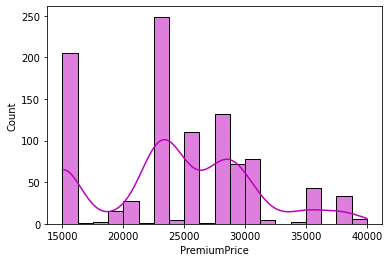

PremiumPrice mode: 23000
PremiumPrice min: 15000
PremiumPrice max: 40000
PremiumPrice median: 23000.0
PremiumPrice mean: 24336.71
PremiumPrice skew: 0.1


In [ ]:
# melihat persebaran kolom target: PremiumPrice

fig, ax = plt.subplots()
sns.histplot(data=data, x='PremiumPrice', bins= 20, color='m', kde = True)
# ax.set_xlim(0,80000)
plt.show()


print('PremiumPrice mode:', data.PremiumPrice.mode()[0])
print('PremiumPrice min:', data.PremiumPrice.min())
print('PremiumPrice max:', data.PremiumPrice.max())
print('PremiumPrice median:', data.PremiumPrice.median())
print('PremiumPrice mean:', round(data.PremiumPrice.mean(),2))
print('PremiumPrice skew:', round(data.PremiumPrice.skew(),2))

Insight:
- Kolom target yang digunakan untuk pembuatan model terdistribusi normal. Dengan Range 15,000 s/d 40,000 dan rata-rata harga premi 24,336.71.

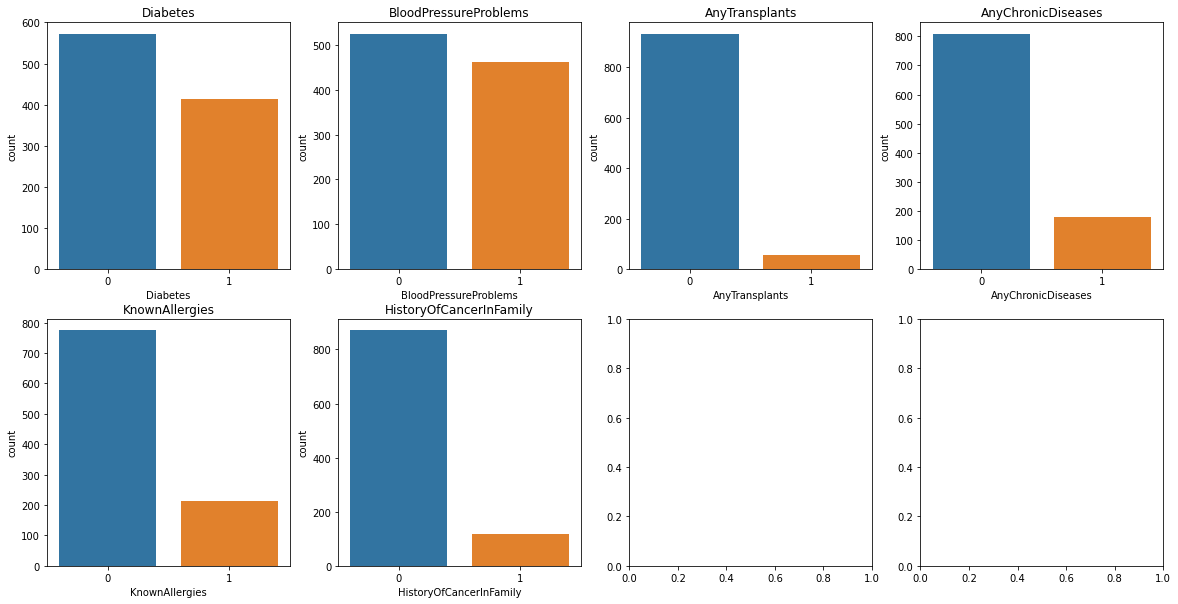

In [ ]:
# melihat persebaran pada kolom kategorikal (countplot)

fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,10))

i=0       # baris
j=0       # kolom

for col in ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']:
    sns.countplot(data=data, x=col, ax=axes[i][j])
    axes[i][j].set_title(col)
    #axes[i][j].legend()
    j+=1
    if j>3:       # ncols = 4, index python 3
        i+=1
        j=0
    if i==2:      # nrows = 2, index python 1
        break

Insight:
- Lebih banyak nasabah yang tidak menderita diabetes, tidak menderita tekanan darah tinggi, tidak pernah melakukan transplantasi organ, tidak memiliki penyakit kronis, tidak memiliki alergi, dan keluarganya tidak memiliki sejarah kanker yang berarti lebih banyak nasabah yang berada pada kesehatan prima.

Age median: 42.0, Age mean: 41.75, Age min: 18, Age max: 66, Age modus: 43
Age skew: 0.03


Height median: 168.0, Height mean: 168.18, Height min: 145, Height max: 188, Height modus: 164
Height skew: -0.18


Weight median: 75.0, Weight mean: 76.95, Weight min: 51, Weight max: 132, Weight modus: 73
Weight skew: 0.67


Kapan memakai Mean dan kapan memakai Median?
Mean digunakan ketika persebaran data normal
Median digunakan ketika persebaran data ditarik ke kiri atau ke kanan (terdapat outliers). Median adalah nilai tengah dari data yang tidak terpengaruh oleh outliers.




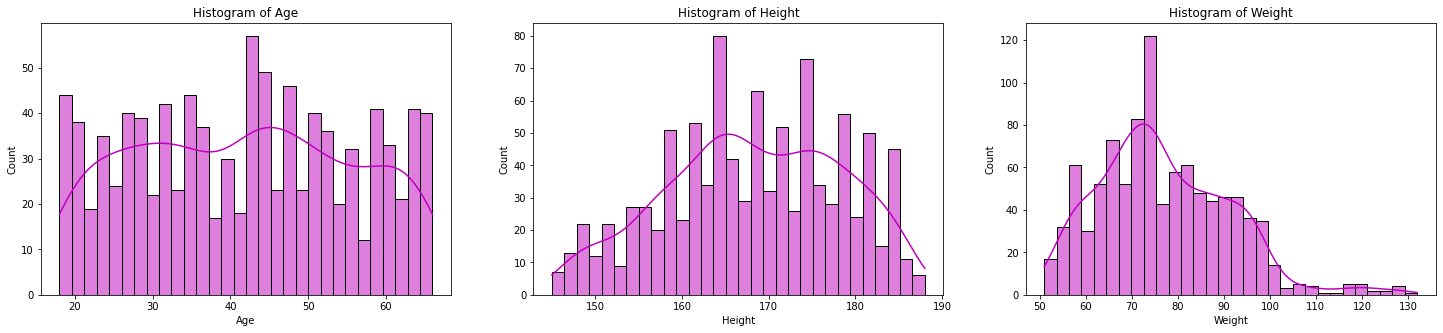

In [ ]:
# melihat persebaran pada kolom numerik

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(25,5))

i=0             # kolom
j=0             # target

for col in ['Age', 'Height', 'Weight']:
    sns.histplot(data=data, x=col, bins= 30, color='m', kde = True, ax=axes[j])
    axes[j].set_title(f'Histogram of {col}')
    #axes[i][j].legend()
    j+=1
    if j>2:                     # ncols = 3, index python 2
        i+=1
        j=0
    if i==1:                    # nrows = 1, index python 0
        break

# melihat mean atau median kolom numerik
## 1
print('Age median: {}, Age mean: {:.2f}, Age min: {}, Age max: {}, Age modus: {}'.format(data.Age.median(),
                                                                                          data.Age.mean(), data.Age.min(),
                                                                                          data.Age.max(), data.Age.mode()[0]))
print(f'Age skew: {data.Age.skew():.2f}')
print('\n')
## 2
print('Height median: {}, Height mean: {:.2f}, Height min: {}, Height max: {}, Height modus: {}'.format(data.Height.median(),
                                                                                                        data.Height.mean(), data.Height.min(),
                                                                                                        data.Height.max(), data.Height.mode()[0]))
print(f'Height skew: {data.Height.skew():.2f}')
print('\n')
##3
print('Weight median: {}, Weight mean: {:.2f}, Weight min: {}, Weight max: {}, Weight modus: {}'.format(data.Weight.median(),
                                                                                                        data.Weight.mean(), data.Weight.min(),
                                                                                                        data.Weight.max(), data.Weight.mode()[0]))
print(f'Weight skew: {data.Weight.skew():.2f}')
print('\n')

print('Kapan memakai Mean dan kapan memakai Median?')
print('Mean digunakan ketika persebaran data normal')
print('Median digunakan ketika persebaran data ditarik ke kiri atau ke kanan (terdapat outliers). Median adalah nilai tengah dari data yang tidak terpengaruh oleh outliers.')
print('\n')

Insight:
- Rata-rata usia nasabah 41 tahun, rata-rata tinggi nasabah 168 cm, median berat nasabah 75 kg.

In [ ]:
# melihat hubungan kolom kategorikal dan target dengan chisquare_contigency

# 1 'Diabetes' vs 'PremiumPrice'
contingency_table_D=pd.crosstab(data['Diabetes'],data["PremiumPrice"])

stat, p, dof, expected = stats.chi2_contingency(contingency_table_D)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably Diabetes is independent')
else:
    print('Probably Diabetes is dependent')
print('')

# 2 'BloodPressureProblems' vs 'PremiumPrice'
contingency_table_BPP=pd.crosstab(data['BloodPressureProblems'],data["PremiumPrice"])

stat, p, dof, expected = stats.chi2_contingency(contingency_table_BPP)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably BloodPressureProblems is independent')
else:
    print('Probably BloodPressureProblems is dependent')
print('')

# 3 'AnyTransplants' vs 'PremiumPrice'
contingency_table_AT=pd.crosstab(data['AnyTransplants'],data["PremiumPrice"])

stat, p, dof, expected = stats.chi2_contingency(contingency_table_AT)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably AnyTransplants is independent')
else:
    print('Probably AnyTransplants is dependent')
print('')

# 4 'AnyChronicDiseases' vs 'PremiumPrice'
contingency_table_ACD=pd.crosstab(data['AnyChronicDiseases'],data["PremiumPrice"])

stat, p, dof, expected = stats.chi2_contingency(contingency_table_ACD)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably AnyChronicDiseases is independent')
else:
    print('Probably AnyChronicDiseases is dependent')
print('')

# 5 'KnownAllergies' vs 'PremiumPrice'
contingency_table_KA=pd.crosstab(data['KnownAllergies'],data["PremiumPrice"])

stat, p, dof, expected = stats.chi2_contingency(contingency_table_KA)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably KnownAllergies is independent')
else:
    print('Probably KnownAllergies is dependent')
print('')

# 6 'HistoryOfCancerInFamily' vs 'PremiumPrice'
contingency_table_HCF=pd.crosstab(data['HistoryOfCancerInFamily'],data["PremiumPrice"])

stat, p, dof, expected = stats.chi2_contingency(contingency_table_HCF)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably HistoryOfCancerInFamily is independent')
else:
    print('Probably HistoryOfCancerInFamily is dependent')

p=0.000
Probably Diabetes is dependent

p=0.000
Probably BloodPressureProblems is dependent

p=0.000
Probably AnyTransplants is dependent

p=0.000
Probably AnyChronicDiseases is dependent

p=0.001
Probably KnownAllergies is dependent

p=0.000
Probably HistoryOfCancerInFamily is dependent


Insight:
- Berdasarkan chisquare Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, KnownAllergies, dan HistoryofCancerInFamily __memiliki pengaruh terhadap PremiumPrice atau harga premi asuransi kesehatan.__

In [ ]:
# melihat hubungan antara kolom 'Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', dan 'PremiumPrice'

X = pd.get_dummies(data[['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']]).corr()
X.style.background_gradient(cmap='coolwarm')

,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.039879,-0.018590,0.429181,0.697540
Height,0.039879,1.000000,0.066946,0.037289,0.026910
Weight,-0.018590,0.066946,1.000000,-0.006108,0.141507
NumberOfMajorSurgeries,0.429181,0.037289,-0.006108,1.000000,0.264250
PremiumPrice,0.697540,0.026910,0.141507,0.264250,1.000000


Insight:
- berdasarkan get_dummies, corr, dan background gradient kolom Age, Weight, NumberofMajorSurgeries __memiliki hubungan yang positif dengan harga premi asuransi kesehatan__, dan kolom Height __tidak memiliki hubungan dengan harga premi asuransi kesehatan.__
- Data scientist akan menggunakan __kolom Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, KnownAllergies, HistoryofCancerInFamily, Age, Weight, NumberofMajorSurgeries sebagai feature.__

__Kumpulan Insight:__

- Kolom target yang digunakan untuk pembuatan model terdistribusi normal. Dengan Range 15,000 s/d 40,000 dan rata-rata harga premi 24,336.71.
- Lebih banyak nasabah yang __tidak menderita diabetes, tidak menderita tekanan darah tinggi, tidak pernah melakukan transplantasi organ, tidak memiliki penyakit kronis, tidak memiliki alergi, dan keluarganya tidak memiliki sejarah kanker yang berarti lebih banyak nasabah yang berada pada kesehatan prima.__
- Rata-rata usia nasabah 41 tahun, rata-rata tinggi nasabah 168 cm, median berat nasabah 75 kg.
- Berdasarkan chisquare Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, KnownAllergies, dan HistoryofCancerInFamily __memiliki pengaruh terhadap PremiumPrice atau harga premi asuransi kesehatan.__
- berdasarkan get_dummies, corr, dan background gradient kolom Age, Weight, NumberofMajorSurgeries __memiliki hubungan yang positif dengan harga premi asuransi kesehatan__, dan kolom Height __tidak memiliki hubungan dengan harga premi asuransi kesehatan.__
- Data scientist akan menggunakan __kolom Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, KnownAllergies, HistoryofCancerInFamily, Age, Weight, NumberofMajorSurgeries sebagai feature.__

# V. Data Preprocessing

## 1. Get Data for model Inference

In [ ]:
# mengambil data untuk inference

data_i = data.sample(20, random_state = 20)

# mengeluarkan data_i dari dataset

data = data.drop(data_i.index)

# mereset index

data_i.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
# memeriksa ukuran hasil

print('Ukuran data asli :',data_o.shape)
print('Ukuran data inference :', data_i.shape)
print('Ukuran data asli - data inference :', data.shape)

Ukuran data asli : (986, 11)
Ukuran data inference : (20, 11)
Ukuran data asli - data inference : (966, 11)


## 2. Splitting Between X and y

In [ ]:
# split X (features) dan y (target)

X = data.drop('PremiumPrice', axis=1)
y = data['PremiumPrice']

In [ ]:
# split train dan set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

# memeriksa ukuran hasil
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (772, 10)
Test Size:  (194, 10)


## 3. Handling Outliers

In [ ]:
# melihat X_train

X_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
360,35,0,1,0,0,162,78,0,0,0
448,19,1,0,0,0,183,70,1,1,1
497,49,0,0,0,0,185,81,0,0,2
201,32,0,1,0,0,176,93,0,0,0
870,45,1,1,0,0,164,68,0,0,1


### a. Memeriksa Persebaran dan Outliers dari X_train Numerik

In [ ]:
# Fungsi membuat histogram dan boxplot

def diagnostic_plots(df_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variable])
    plt.title('Boxplot')

    plt.show()
    
    print('skewness:', df_train[variable].skew())
    if (df_train[variable].skew() >= -0.5 ) | (df_train[variable].skew() <= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

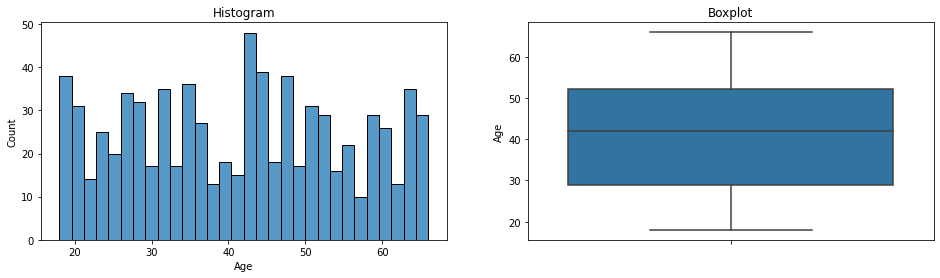

skewness: 0.0527180160631325
the distribution is skewed


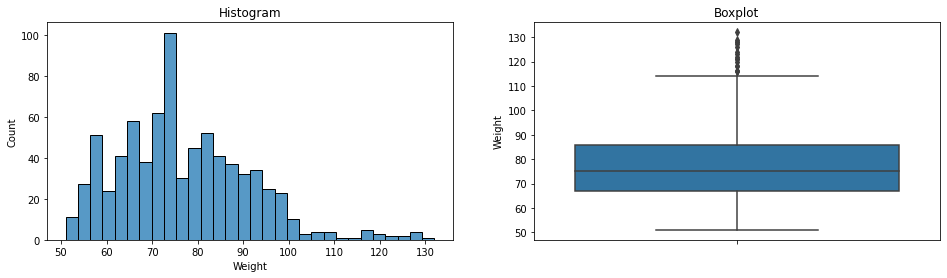

skewness: 0.759215894658596
the distribution is skewed


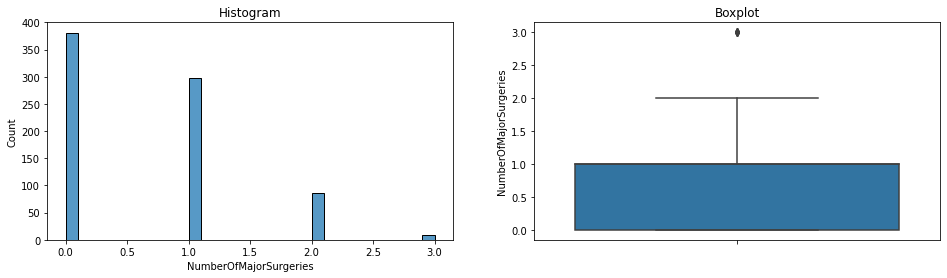

skewness: 0.8308944595236998
the distribution is skewed


In [ ]:
# memeriksa outlier pada semua kolom

diagnostic_plots(X_train, 'Age')
diagnostic_plots(X_train, 'Weight')
diagnostic_plots(X_train, 'NumberOfMajorSurgeries')

### b. Outlier detection for skewed variables

In [ ]:
# fungsi untuk skew distribution
def find_skewed_boundaries(df_train, variable, distance):
    IQR = df_train[variable].quantile(0.75) - df_train[variable].quantile(0.25)

    lower_boundary = df_train[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df_train[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# Fungsi untuk memfilter outlier (mencari outlier)
def find_outliers(df_train,variable,upper,lower):
  return df_train[
            (df_train[variable] > upper) |
            (df_train[variable] < lower)
            ]

In [ ]:
# Melihat batas atas dan bawah dari outliers

upper1, lower1 = find_skewed_boundaries(X_train, 'Weight', 1.5)
print('upper1 and lower1 = ', upper1,' and ', lower1)

upper1 and lower1 =  114.5  and  38.5


Data Scientist memutuskan untuk melakukan capping terhadap outliers.

### c. Handling Outliers

In [ ]:
# capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Weight'])

# capping

windsoriser.fit(X_train)
X_train_t = windsoriser.transform(X_train)

## 4. Handling Missing Values

Berdasarkan EDA tidak terdapat missing values pada dataset.

In [ ]:
# # metode pemeriksaan missval

# # memeriksa missval pada X_train

# X_train.isnull().sum()

# # memeriksa missval pada y_train

# y_train.isnull().sum()

# # memeriksa missval pada X_test

# X_test.isnull().sum()

# # memeriksa missval pada y_test

# y_test.isnull().sum()

## 5. Feature Selection

Berdasarkan EDA dan Field Knowledge, Datascientist memilih semua feature kecuali kolom 'Height'.

In [ ]:
# menghapus kolom Height yang tidak disertakan sebagai feature.

X_train.drop('Height', axis = 1, inplace=True)
X_test.drop('Height', axis = 1, inplace=True)

# melihat feature yang dipilih

X_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
360,35,0,1,0,0,78,0,0,0
448,19,1,0,0,0,70,1,1,1
497,49,0,0,0,0,81,0,0,2
201,32,0,1,0,0,93,0,0,0
870,45,1,1,0,0,68,0,0,1


Statement:

- Berdasarkan EDA dan Field Knowledge, Datascientist memilih feature usia, diabetes, tekanan darah tinggi, pernah melakukan transplantasi organ, penyakit kornis, berat badan, alergi, riwayat kanker pada keluarga, dan jumlah operasi besar.

## 6. Split Between Numerical Columns and Categorical Columns

In [ ]:
# display columns name

X_train.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'],
      dtype='object')

In [ ]:
# memilih num_columns dan cat_columns

num_cols_norm =['Age']
num_cols_skew = ['Weight']
cat_cols_encoded = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',  'NumberOfMajorSurgeries']

In [ ]:
# # cara memisahkan numerical columns dan categorical columns (string) dengan select_dtypes()

# num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# print('Numerical Columns    :', num_cols)
# print('Categorical Columns  :', cat_cols)

# # Split Train-Set and Test-Set (without pipeline) based on Column Types 

# X_train_numnorm = X_train[num_cols_norm]
# X_train_numskew = X_train[num_cols_skew]
# X_train_cat = X_train[cat_cols]

# X_test_numnorm = X_test[num_cols_norm]
# X_test_numskew = X_test[num_cols_skew]
# X_test_cat = X_test[cat_cols]

## 7. Feature Scaling dan Encoding

Data scientist menggunakan StandardScaling untuk menscaling feature numerik yang terdistribusi normal dan menggunakan MinMaxScaling untuk menscaling feature numerik yang terdistribusi tidak normal. 

Data scientist tidak melakukan OrdinalEncoding, OneHotEncoding, ataupun LabelEncoding terhadap feature categorical karena feature categorical sudah berbentuk angka atau skalar.

In [ ]:
# Scaling menggunakan Pipeline, ColumnTransformer, StandardScaler dan MinMaxScaler

## Numeric Features Scaling
num_skew = Pipeline([('scaling', MinMaxScaler())])
num_norm = Pipeline([('scaling', StandardScaler())])

## Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('norm_scale', num_norm, num_cols_norm),
    ('skew_scale', num_skew, num_cols_skew)])

## masih oneng??? num_norm, num_cols_norm, num_skew, num_cols_skew
## alasan mengapa tidak diconcat lagi

In [ ]:
# Scaling dan Encode tanpa pipeline 

# # StandardScaler
# scaler = StandardScaler()         

# X_train_num_scaled = scaler.fit_transform(X_train_numnorm)      # fit_transform untuk train dan fit untuk test
# X_test_num_scaled = scaler.transform(X_test_numnorm)

# # # MinMaxScaler
# scaler = MinMaxScaler()         

# X_train_numskew_scaled = scaler2.fit_transform(X_train_numskew)      # fit_transform untuk train dan fit untuk test
# X_test_numskew_scaled = scaler2.transform(X_test_numskew)

# # # OrdinalEncoder
# encoder = OrdinalEncoder(categories=[['list of categories feat-1'], ['list of categories feat-2']])         

# X_train_cator_scaled = encoder.fit(X_train_cat)
# X_train_cator_scaled = encoder.fit_transform(X_train_cat)      # fit_transform untuk train dan fit untuk test
# X_test_cator_scaled = encoder.transform(X_test_cat)

# # # OneHotEncoder

# # # LabelEncoder

Statement:

- Data scientist menggunakan StandardScaling untuk menscaling feature numerik yang terdistribusi normal dan menggunakan MinMaxScaling untuk menscaling feature numerik yang terdistribusi tidak normal. 

# VI. Model Definition

In [ ]:
# Linear Regression Pipeline
lin_pipe = Pipeline([('preprocessing', preprocess), ('lin', LinearRegression())])

# Support Vector Machine Pipeline
las_pipe = Pipeline([('preprocessing', preprocess), ('las', Lasso(alpha=0.01))])            # dasar pemilihan alpha?

# Random Forest Pipeline
rdg_pipe = Pipeline([('preprocessing', preprocess), ('rdg', Ridge())])

# Bagging Pipeline
ada_pipe = Pipeline([('preprocessing', preprocess), ('bag', AdaBoostRegressor())])

# Extreme Gradient Boosting Pipeline
xgb_pipe = Pipeline([('preprocessing', preprocess), ('xgb', XGBRegressor())])

# VII. Model Training

In [ ]:
# Training model

%time lin_pipe.fit(X_train, y_train)
%time las_pipe.fit(X_train, y_train)
%time rdg_pipe.fit(X_train, y_train)
%time ada_pipe.fit(X_train, y_train)
%time xgb_pipe.fit(X_train, y_train)

CPU times: user 16.4 ms, sys: 1.04 ms, total: 17.5 ms
Wall time: 25.5 ms
CPU times: user 12 ms, sys: 51 µs, total: 12 ms
Wall time: 12.4 ms
CPU times: user 16.8 ms, sys: 2.1 ms, total: 18.9 ms
Wall time: 19.4 ms
CPU times: user 31.3 ms, sys: 26 µs, total: 31.3 ms
Wall time: 31.8 ms
[10:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 77.2 ms, sys: 22.2 ms, total: 99.4 ms
Wall time: 219 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('skew_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Weight'])])),
                ('xgb', XGBRegressor())])

# VIII. Model Evaluation

Statement:

1. Nyatakan apakah model overfit/underfit/good-fit

2. Narasikan dalam bahasa business

3. Temukan hal yang unik

## 1. Cross-Val

Melakukan model evaluation menggunakan cross validation score untuk mencari model terbaik.

In [ ]:
scores_log = cross_val_score(lin_pipe, X_train, y_train, cv=5, scoring='r2')
scores_xgb = cross_val_score(xgb_pipe, X_train, y_train, cv=5, scoring='r2')
scores_rdg = cross_val_score(rdg_pipe, X_train, y_train, cv=5, scoring='r2')
scores_ada = cross_val_score(ada_pipe, X_train, y_train, cv=5, scoring='r2')
scores_las = cross_val_score(las_pipe, X_train, y_train, cv=5, scoring='r2')

[10:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('----Linear Regression----')
print(f'Linear Mean : {scores_log.mean()}')
print(f'Linear Std : {scores_log.std()}')
print('')
print('----Ridge Regression----')
print(f'Rigde Mean : {scores_rdg.mean()}')
print(f'Ridge Std : {scores_rdg.std()}')
print('')
print('----Lasso Regression Tree----')
print(f'Lasso Mean : {scores_las.mean()}')
print(f'Lasso Std : {scores_las.std()}')
print('')
print('----AdaBoost----')
print(f'AdaBoost Mean : {scores_ada.mean()}')
print(f'AdaBoost Std : {scores_ada.std()}')
print('')
print('----Extreme Gradient Boosting----')
print(f'XGB Mean : {scores_xgb.mean()}')
print(f'XGB Std : {scores_xgb.std()}')

----Linear Regression----
Linear Mean : 0.5275627557136795
Linear Std : 0.09322517296601388

----Ridge Regression----
Rigde Mean : 0.5276840541045709
Ridge Std : 0.09424522040322476

----Lasso Regression Tree----
Lasso Mean : 0.5275628128412893
Lasso Std : 0.09322635313366642

----AdaBoost----
AdaBoost Mean : 0.5147195560488791
AdaBoost Std : 0.07502214749309156

----Extreme Gradient Boosting----
XGB Mean : 0.6006832219305729
XGB Std : 0.11295291590274792


Dari hasil cross validation score di atas kita bisa melihat bahwa model XGB mendapatkan rata-rata R2 score tertinggi yaitu 0.60 dengan standar deviasi yang sangat rendah, namun akan kita pastikan lagi apakah overfit atau tidak pada train dan test set.

In [ ]:
# Model Evaluation Using MAE and R2
print('Extrene Gradient Boosting Model')
print('')
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, xgb_pipe.predict(X_train)))
print(f'Train-Set R2 Score: {r2_score(y_train, xgb_pipe.predict(X_train))}')
print('')
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, xgb_pipe.predict(X_test)))
print(f'Test-Set R2 Score: {r2_score(y_test, xgb_pipe.predict(X_test))}')

Extrene Gradient Boosting Model

Train-Set Mean Absolute Error (MAE):  2021.1653186224903
Train-Set R2 Score: 0.7232843916839988

Test-Set Mean Absolute Error (MAE):  2783.7366653914305
Test-Set R2 Score: 0.5507679899018454


Baseline model XGB kita sudah masih underfit dan membutuhkan tunning lebih lanjut.

## 2. Hyperparameter Tuning

In [ ]:
param_xgb = {'xgb__max_depth': [1, 5, 10],
             'xgb__learning_rate' : [0.1, 0.2]}

In [ ]:
grid_xgb = GridSearchCV(xgb_pipe, param_grid=param_xgb, cv=5, n_jobs=-1, return_train_score=True)

In [ ]:
grid_xgb.fit(X_train, y_train)

[10:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('norm_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Age']),
                                                                        ('skew_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          MinMaxScaler())]),
                                                                         ['Weight'])])),
                                       ('xgb', XGBRegressor())]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.1, 0.2],
       

In [ ]:
grid_xgb.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('skew_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Weight'])])),
                ('xgb', XGBRegressor(max_depth=1))])

Ternyata model XGB menghasilkan score paling tinggi menggunakan parameter max_depth 1.

In [ ]:
# Model Evaluation Using MAE and R2
print('Extrene Gradient Boosting Model')
print('')
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, grid_xgb.best_estimator_.predict(X_train)))
print(f'Train-Set R2 Score: {r2_score(y_train, grid_xgb.best_estimator_.predict(X_train))}')
print('')
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, grid_xgb.best_estimator_.predict(X_test)))
print(f'Test-Set R2 Score: {r2_score(y_test, grid_xgb.best_estimator_.predict(X_test))}')

Extrene Gradient Boosting Model

Train-Set Mean Absolute Error (MAE):  2399.7925045033194
Train-Set R2 Score: 0.6387356308946807

Test-Set Mean Absolute Error (MAE):  2719.781989972616
Test-Set R2 Score: 0.5804288386115033


# X. Model Inference

In [ ]:
# duplicate data_i

data_i_copy = data_i.copy()

# feature_selection

data_i.drop(columns=['Height'], inplace = True)

# handling outlier

In [ ]:
# melakukan predict pada inference set

y_pred_i = grid_xgb.best_estimator_.predict(data_i)

In [ ]:
# Membuat hasil prediksi menjadi dataframe

y_pred_inf_df = pd.DataFrame(y_pred_i, columns=['Price_Pred'])

In [ ]:
pred_inf = pd.concat([data_i['PremiumPrice'], y_pred_inf_df], axis=1)
pred_inf

,PremiumPrice,Price_Pred
0,15000,16053.005859
1,23000,27043.656250
2,28000,26852.941406
3,23000,23403.224609
4,30000,29064.988281
5,29000,28509.541016
6,39000,15664.710938
7,21000,23014.927734
8,23000,22538.552734
9,35000,30760.085938


In [ ]:
# Model Evaluation Using MAE and R2
print('Extrene Gradient Boosting Model')
print('')
print('Inference-Set Mean Absolute Error (MAE): ', mean_absolute_error(data_i['PremiumPrice'], y_pred_i))
print(f'Inference-Set R2 Score: {r2_score(data_i.PremiumPrice, y_pred_i)}')

Extrene Gradient Boosting Model

Inference-Set Mean Absolute Error (MAE):  3556.27578125
Inference-Set R2 Score: -0.1485393804551307


In [ ]:
# # Get Intercept and Slope from lin_pipe

# print('Intercept : ', lin_pipe.intercept_)       # y = ax + b; a coef, b intercept
# print('Slope     : ', lin_pipe.coef_)            # y = ax1 + bx2 + c; a, b coef, c intercept
#                                                       # intercept dan slope nanti untuk menghitung rating

# # List All Columns

# X_train.columns

# XI. Pengambilan Kesimpulan

1. Narasi based on EDA.

2. Narasi based on Model Evaluation.

3. Narasi based on Model Analysis.

4. Hal lain yang ingin diutarakan: misal originalitas dataset dilakukan.

__Kesimpulan:__

Dari proses EDA ditemukan beberapa hal:

- Terdapat lebih banyak nasabah yang tidak menderita diabetes, tidak tekanan darah tinggi, tidak pernah melakukan transplantasi organ, tidak memiliki penyakit kronis, tidak memiliki alergi, dan tidak memiliki sejarah kanker di keluarga.
- Kolom age, height terdistribusi normal
- Kolom weight dan NumberOfMajorSurgeries mengalami rightskew
- kolom target terdistribusi normal.
- Terdapat hubungan antara kolom diabetes, tekanan darah tinggi, pernah atau tidak melakukan transplantasi organ, memiliki atau tidak penyakit kronis, memiliki atau tidak alergi, dan memiliki sejarah kanker di keluarga atau tidak, kolom usia, berat badan, jumlah operasi besar dengan kolom Harga Premi.
- Kurang adanya hubungan kolom tinggi badan dengan kolom Harga Premi.

Dari proses preprocessing didapatkan:
- Kita menggunakan metode pipeline untuk scaling dan modeling

Dari proses model evaluation dan analysis didapatkan:
- model yang digunakan adalah lin_reg, xgboost, randomforestregress

Insigth:
- Diperlukan lebih banyak feature yang berkorelasi
- Data Scientist perlu mencoba hipertuning lebih lanjut dan model lain.


# XII. Model Saving

In [ ]:
with open('model_xgb.pkl', 'wb') as file_1:
  joblib.dump(grid_xgb.best_estimator_, file_1)

In [ ]:
with open('lin_pipe.pkl', 'wb') as file_2:
  joblib.dump(lin_pipe, file_2)

# XIII. Deployment



Herokuapp: [tidak dapat diakses lagi karena berbayar] https://insurance-price-predict-wcs.herokuapp.com/